# Try RandomForestRegressor with grid of various parameters

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
training_data = pd.read_csv('../Datasets/training_data_full.csv')

In [3]:
non_numerical_features = set([
    'StateAbbr',
    'StateDesc',
    'CityName',
    'CountyFIPS',
    'TractFIPS'
])

target_features = set([
    'DIABETES_3Y_Change_Percentage'
])

numerical_features = list(
    set(training_data.columns) - non_numerical_features - target_features
)

In [4]:
features = training_data[numerical_features]
labels = training_data['DIABETES_3Y_Change_Percentage']

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size = 0.2, random_state = 42)

# Hyperparameters from gridsearch cv

In [6]:
regr = RandomForestRegressor(max_depth=25, n_estimators=1400, max_features = 1, random_state=15, n_jobs=16)

In [7]:
history = regr.fit(X_train, Y_train)

Train R2 score is 0.84468
Test R2 score is 0.2047


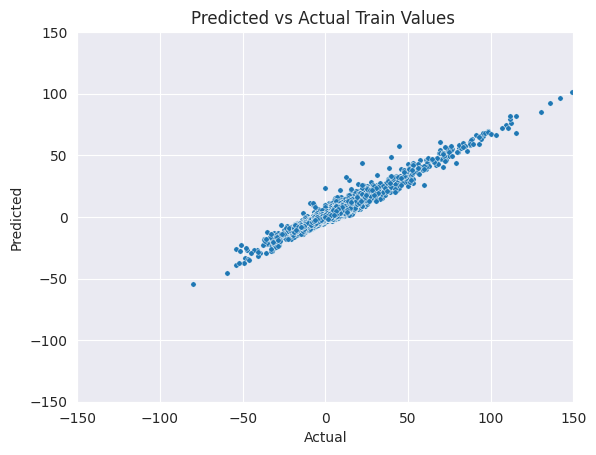

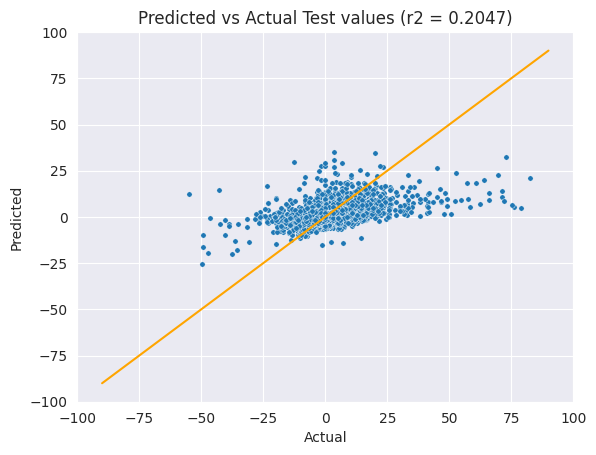

In [37]:
%run -i ./Model_Eval.ipynb
evaluate_regression_model(
    regr,
    None,
    X_train,
    Y_train,
    X_test,
    Y_test
)

# Sort the feature importances, show the top 10

In [9]:
feature_importance_list = list(zip(numerical_features, regr.feature_importances_))

In [10]:
feature_importance_list.sort(key=lambda x: x[1], reverse=True)

In [11]:
top_features = feature_importance_list[0:10]

In [12]:
top_features

[('DIABETES_2017', 0.031049177933179753),
 ('HIGHCHOL_2017', 0.029106217763466866),
 ('BPMED_2017', 0.027941239267657264),
 ('BPMED_trend', 0.027911550145009498),
 ('DIABETES_trend', 0.02687128883813276),
 ('ARTHRITIS_2017', 0.026550314539305543),
 ('BPHIGH_2017', 0.026492680193057488),
 ('CHD_2017', 0.02639821400604655),
 ('CHECKUP_2017', 0.026393365839364566),
 ('COPD_2017', 0.025989585704202057)]

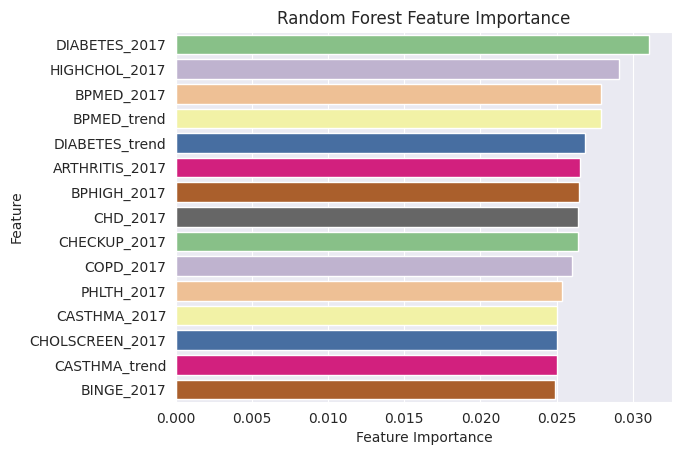

In [13]:
%run -i ./Model_Eval.ipynb

plot_feature_importance(regr.feature_importances_, numerical_features, 'Random Forest', 15)